# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [12]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [13]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return len(M),len(M[0])

In [14]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [15]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    newM = [[round(x,decPts) for x in row] for row in M]
    for i in range(len(M)):
        M[i] = newM[i]
    

In [16]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.024s

OK


## 1.4 计算矩阵的转置

In [17]:
# TODO 计算矩阵的转置
def transpose(M):
    newM = zip(*M)
    newM = [list(row) for row in newM]
    return newM

In [18]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


## 1.5 计算矩阵乘法 AB

In [19]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    tranB = transpose(B)
    if(len(A[0])!=len(B)):
        return "Matrix A\'s column number doesn\'t equal to Matrix b\'s row num"
      
    M = [[0 for i in range(len(tranB))] for i in range(len(A))]
    for i in range(len(A)):  
        for j in range(len(tranB)):
            M[i][j] = sum([x*y for x,y in zip(A[i],tranB[j])])
    return M
  
    

In [20]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

F
FAIL: test_matxMultiply (__main__.LinearRegressionTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/alexey/开发/机器学习/线性代数/work/test.py", line 64, in test_matxMultiply
    matxMultiply(mat1.tolist(),mat2.tolist())
AssertionError: ValueError not raised : Matrix A's column number doesn't equal to Matrix b's row number

----------------------------------------------------------------------
Ran 1 test in 0.084s

FAILED (failures=1)


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [15]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    M = [[0 for i in range(len(A[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            M[i][j] = A[i][j]
        M[i].append(b[i][0])
    return M

In [16]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [25]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    tmp = M[r1]
    M[r1] = M[r2]
    M[r2] = tmp

In [26]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [27]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    M[r] = [x*scale for x in M[r]]

In [28]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

F
FAIL: test_scaleRow (__main__.LinearRegressionTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/alexey/开发/机器学习/线性代数/work/test.py", line 106, in test_scaleRow
    scaleRow(mat,rr,0)
AssertionError: ValueError not raised

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (failures=1)


In [29]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [x+y*scale for x,y in zip(M[r1],M[r2])]

In [30]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为奇异矩阵，矩阵A为非奇异矩阵两种情况。

In [23]:
# 不要修改这里！
from helper import generateMatrix,printInMatrixFormat
    
rank = 4
A = generateMatrix(rank,singular=False)
b = np.ones(shape=(rank,1)) # it doesn't matter
printInMatrixFormat(rank,A,b)

   -3,    7,    4,   -2 || 1    
    3,   -3,    8,    2 || 1    
   -7,   -2,    2,   -1 || 1    
    5,   -8,    0,    3 || 1    


请按照算法的步骤3，逐步推演增广矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵

增广矩阵
$ Ab = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$...$

In [24]:
# 不要修改这里！
rank = 4
A = generateMatrix(rank,singular=True)
b = np.ones(shape=(rank,1)) # it doesn't matter

printInMatrixFormat(rank,A,b)

    0,   -2,   -8,  -10 || 1    
    4,   -8,   -1,    0 || 1    
    3,    0,   -4,   -1 || 1    
   -2,    3,    9,    6 || 1    


请按照算法的步骤3，逐步推演增广矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵

增广矩阵
$ Ab = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0\end{bmatrix}$
    
$...$

### 2.3.3 实现 Gaussian Jordan 消元法

In [1]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    if(len(A)!=len(b)):return None
    
    for i in range(len(A[0])):
        maxLine = 0 
        for j in range(len(A)-1):
            if(A[j][i]<A[j+1][i]):
                maxLine = j+1
        
 
    return None

SyntaxError: invalid syntax (<ipython-input-1-69a253d9eaf6>, line 16)

In [11]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

F
FAIL: test_gj_Solve (__main__.LinearRegressionTestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/alexey/开发/机器学习/线性代数/work/test.py", line 143, in test_gj_Solve
    self.assertNotEqual(x,None,"Matrix A is not singular")
AssertionError: None == None : Matrix A is not singular

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (failures=1)


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

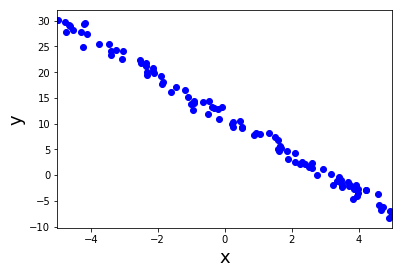

In [12]:
# 不要修改这里！
from helper import generatePoints
from matplotlib import pyplot as plt

X,Y = generatePoints(num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

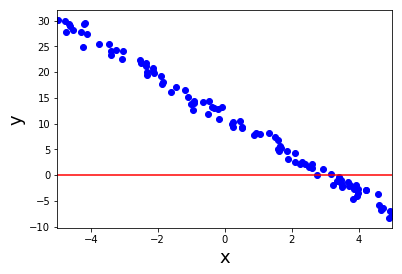

In [13]:
#TODO 请选择最适合的直线 y = kx + b
k = 0
b = 0

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [k*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [ ]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    return 0

print(calculateMSE(X,Y,m,b))

### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [ ]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):
    return None,None

m,b = linearRegression(X,Y)
print(m,b)

你求得的回归结果是什么？它足够好了吗？请使用运行以下代码将它画出来。

In [ ]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(x,y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()